# Data, Library, Utils

In [2]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('dataset/creditcard.csv')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
def calculate_metrics(y_actual, y_pred):
    f1_sc = f1_score(y_actual, y_pred)
    acc_sc = accuracy_score(y_actual, y_pred)
    rec_sc = recall_score(y_actual, y_pred)
    prec_sc = precision_score(y_actual, y_pred)
    conf = confusion_matrix(y_actual, y_pred)
    tn, fp, fn, tp = conf.ravel()
    print(" accuracy:" + str((tn+tp)/(tp+tn+fp+fn)))
    res = " accuracy score: {}\n recall_score: {}\n precision_score: {}\n f1_score: {}"
    print(res.format(acc_sc, rec_sc, prec_sc, prec_sc, f1_sc))
    
    return conf

# Decision Tree

### Training Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Evaluate Decision Tree model

----------------------------
The training accuracy
----------------------------
 accuracy:1.0
 accuracy score: 1.0
 recall_score: 1.0
 precision_score: 1.0
 f1_score: 1.0
----------------------------
The test accuracy
----------------------------
 accuracy:0.9991397773954567
 accuracy score: 0.9991397773954567
 recall_score: 0.7755102040816326
 precision_score: 0.7378640776699029
 f1_score: 0.7378640776699029


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

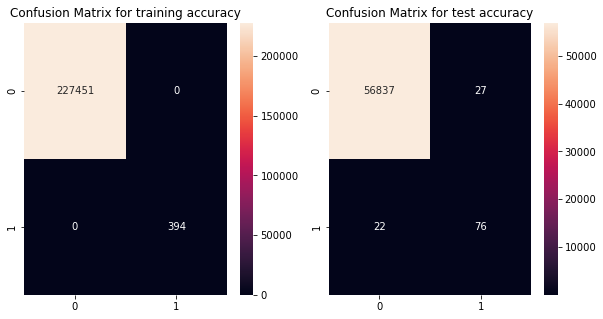

In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')


### Random Over Sampler + Decision Tree

In [12]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train,y_train)

model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

#### Evaluate ROS + Decision Tree model

----------------------------
The training accuracy
----------------------------
 accuracy:1.0
 accuracy score: 1.0
 recall_score: 1.0
 precision_score: 1.0
 f1_score: 1.0
----------------------------
The test accuracy
----------------------------
 accuracy:0.9991748885221726
 accuracy score: 0.9991748885221726
 recall_score: 0.7551020408163265
 precision_score: 0.7628865979381443
 f1_score: 0.7628865979381443


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

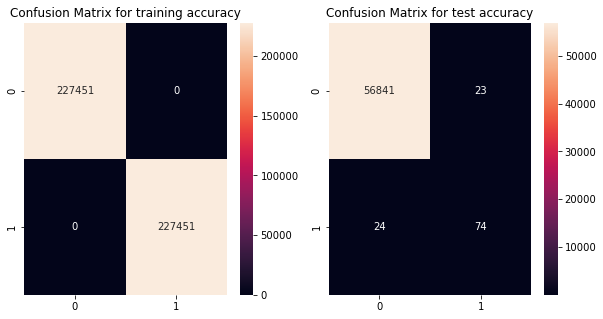

In [13]:
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train_resampled, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')

### Decision Tree + Randomized parameter search

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer

param_grid = {"criterion" : ['gini', 'entropy', 'log_loss'], 'max_depth' : [5,10,20,30], 'min_samples_leaf': [6,10,20,30,40,200]}

model = DecisionTreeClassifier(random_state=42)

scorer = make_scorer(fbeta_score,beta=1)
dtree_gscv = RandomizedSearchCV(model, param_distributions=param_grid, scoring='recall', verbose=3)

grid_fit = dtree_gscv.fit(X_train, y_train)

print(dtree_gscv.best_params_)

best_classifier = grid_fit.best_estimator_
y_train_pred = best_classifier.predict(X_train)
y_test_pred = best_classifier.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=40;, score=0.846 total time=  12.1s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=40;, score=0.544 total time=  10.5s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=40;, score=0.722 total time=  10.5s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=40;, score=0.595 total time=   9.0s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=40;, score=0.722 total time=  11.1s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=20;, score=0.808 total time=  12.4s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=20;, score=0.633 total time=  13.1s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=20;, score=0.684 total time=  11.3s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=20;, score=0.772 total time=  11.6s
[CV 5/5] END criterion=entropy, max_depth=20, mi

c:\Users\atik_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\atik_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\atik_\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\atik_\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_me

{'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'entropy'}
----------------------------
The training accuracy
----------------------------
 accuracy:0.9996269393666747
 accuracy score: 0.9996269393666747
 recall_score: 0.8451776649746193
 precision_score: 0.9327731092436975
 f1_score: 0.9327731092436975
----------------------------
The test accuracy
----------------------------
 accuracy:0.9995611109160493
 accuracy score: 0.9995611109160493
 recall_score: 0.8163265306122449
 precision_score: 0.9195402298850575
 f1_score: 0.9195402298850575


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

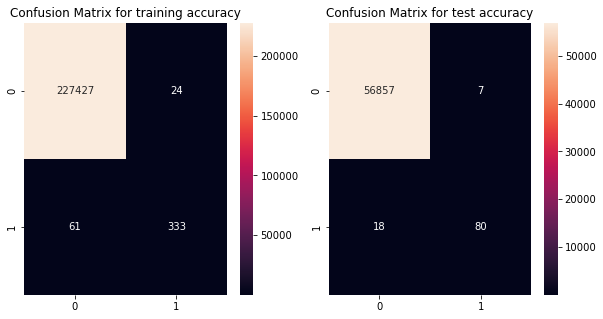

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')

----------------------------
The training accuracy
----------------------------
 accuracy:1.0
 accuracy score: 1.0
 recall_score: 1.0
 precision_score: 1.0
 f1_score: 1.0
----------------------------
The test accuracy
----------------------------
 accuracy:0.9978055545802464
 accuracy score: 0.9978055545802464
 recall_score: 0.7857142857142857
 precision_score: 0.425414364640884
 f1_score: 0.425414364640884


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

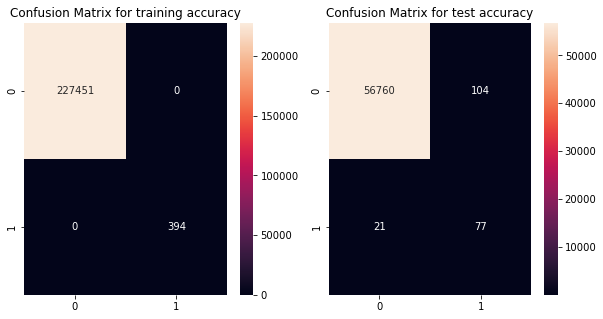

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

dtc = DecisionTreeClassifier(random_state=42)
pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),dtc)

model = pipeline.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')

# Logistic Regression + SMOTE

c:\Users\atik_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\atik_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
T

----------------------------
The training accuracy
----------------------------
 accuracy:0.9818780311176458
 accuracy score: 0.9818780311176458
 recall_score: 0.9086294416243654
 precision_score: 0.08043136373848574
 f1_score: 0.08043136373848574
----------------------------
The test accuracy
----------------------------
 accuracy:0.9809697693198974
 accuracy score: 0.9809697693198974
 recall_score: 0.9081632653061225
 precision_score: 0.07646048109965636
 f1_score: 0.07646048109965636


<AxesSubplot:title={'center':'Confusion Matrix for test accuracy'}>

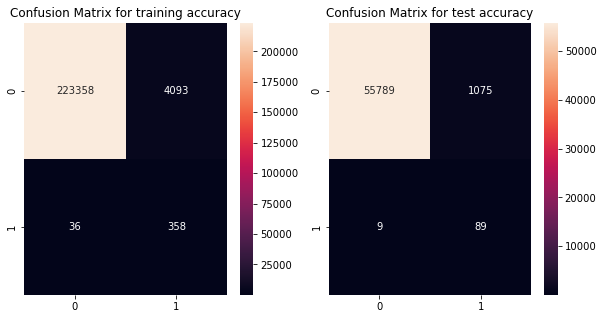

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression(penalty='l2')
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=5)

pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)

model = pipeline.fit(X_train, y_train)
best_est = rand_log_reg.best_estimator_

y_train_pred = best_est.predict(X_train)
y_test_pred = best_est.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')


# Support Vector Machine

In [9]:
from sklearn.svm import SVC
svm_c = SVC()
parameters = {
    'C': list(range(1,3)),
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': list(range(1,4))
}

# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(svm_c, param_distributions=parameters, scoring='recall', verbose=3)

# wasn't able to get a result without scaling
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

# Fit the model on the training data
random_search.fit(X_train, y_train)

best_est = random_search.best_estimator_

# Make predictions on the test data
y_train_pred = best_est.predict(X_train)
y_test_pred = best_est.predict(X_test)

print('----------------------------\nThe training accuracy\n----------------------------')
train_conf_mat = calculate_metrics(y_train, y_train_pred)
print('----------------------------\nThe test accuracy\n----------------------------')
test_conf_mat = calculate_metrics(y_test, y_test_pred)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.set_title('Confusion Matrix for training accuracy')
sns.heatmap(train_conf_mat,ax=ax1, annot=True, fmt='d')

ax2.set_title('Confusion Matrix for test accuracy')
sns.heatmap(test_conf_mat,ax=ax2, annot=True, fmt='d')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........C=2, degree=3, kernel=poly;, score=0.821 total time=   7.0s
[CV 2/5] END ........C=2, degree=3, kernel=poly;, score=0.772 total time=   7.9s
[CV 3/5] END ........C=2, degree=3, kernel=poly;, score=0.759 total time=   7.1s
